In [1]:
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!python3 'drive/MyDrive/KMU/4학년 1학기/딥러닝/팀프로젝트 7조/plz_base/test.py'\
'--batch_size=1'\
'--max_size=400'\
'--num_workers=2'\
"--base_path=drive/MyDrive/KMU/4학년 1학기/딥러닝/팀프로젝트 7조/plz_base"\
"--load_path=model_7.pth"\
"--wandb_project_name=DL_project"\
"--wandb_entity_name=jimin_"\
"--wandb_name=test_01"

wandb: Currently logged in as: jimin_. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.13.6
wandb: Run data is saved locally in /content/wandb/run-20221210_072731-12krb0l0
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run test_01
wandb: ⭐️ View project at https://wandb.ai/jimin_/DL_project
wandb: 🚀 View run at https://wandb.ai/jimin_/DL_project/runs/12krb0l0
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
class number : 8
creating index...
index created!

Categories
1: Can
2: Foam
3: Glass
4: Metal
5: Other
6: Paper
7: Plastic
8: Vinyl

Dataset length : 150
-----test start-----
  0% 0/150 [00:00<?, ?it/s]t torch.Size([5, 400, 400])
  1% 1/150 [00:04<11:05,  4.47s/it]t torch.Size([3, 400, 400])
  1% 2/150 [00:04<05:05,  2.06s/it]t torch.Size([5, 400, 400])
  2% 3/150 [00:05<03:01,  1.23s/it]t torch.Size([2, 400, 400])
  3% 4/150 [00:05<02:03,  1.18it/s]t torch.Size([1, 400, 400])
  3% 5/150 [00:05<

In [4]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 6.8 MB/s 
     |████████████████████████████████| 182 kB 77.8 MB/s 
     |████████████████████████████████| 168 kB 70.4 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 168 kB 77.7 MB/s 
     |████████████████████████████████| 166 kB 78.5 MB/s 
     |████████████████████████████████| 166 kB 81.4 MB/s 
     |████████████████████████████████| 162 kB 85.9 MB/s 
     |████████████████████████████████| 162 kB 82.3 MB/s 
     |████████████████████████████████| 158 kB 83.9 MB/s 
     |████████████████████████████████| 157 kB 84.6 MB/s 
     |████████████████████████████████| 157 kB 79.0 MB/s 
     |████████████████████████████████| 157 kB 82.8 MB/s 
     |████████████████████████████████| 157 kB 68.5 MB/s 
     |████████████████████████████████| 157 kB 84.6 MB/s 
     |████████████████████████████

In [ ]:
!python3 'drive/MyDrive/KMU/4학년 1학기/딥러닝/팀프로젝트 7조/plz_base/train.py'\
'--batch_size=16'\
'--lr=1e-5'\
'--max_size=400'\
'--num_workers=2'\
'--num_epoch=10'\
"--base_path=drive/MyDrive/KMU/4학년 1학기/딥러닝/팀프로젝트 7조/plz_base"\
"--save_path=model_8.pth"\
"--wandb_project_name=DL_project"\
"--wandb_entity_name=jimin_"\
"--wandb_name=train_2"

3
wandb: Currently logged in as: jimin_. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.13.6
wandb: Run data is saved locally in /content/wandb/run-20221211_160316-21vb3vmg
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run train_2
wandb: ⭐️ View project at https://wandb.ai/jimin_/DL_project
wandb: 🚀 View run at https://wandb.ai/jimin_/DL_project/runs/21vb3vmg
loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
class number : 8
creating index...
index created!

Categories
1: Can
2: Foam
3: Glass
4: Metal
5: Other
6: Paper
7: Plastic
8: Vinyl

Dataset length : 1200
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
class number : 8
creating index...
index created!

Categories
1: Can
2: Foam
3: Glass
4: Metal
5: Other
6: Paper
7: Plastic
8: Vinyl

Dataset length : 150
  0% 0/75 [00:00<?, ?it/s]
-----train start-----
epoch :0
  1% 1/75 [00:32<40:10, 32.58s/it, loss=4.1]epo

In [ ]:
import os
import numpy as np
from PIL import Image
from pycocotools.coco import COCO
import csv
import json
import copy

import torch
from torch.utils.data import Dataset

class TACO_Dataset(Dataset):
    def __init__(self, path, mode, round, transforms=None):
        # file path
        self.data_path = os.path.join(path, 'data')
        self.ann_path = os.path.join(self.data_path, 'annotations')

        if round != None:
            self.ann_path += "_" + str(round) + "_" + mode + ".json"
        else:
            self.ann_path += ".json"

        # coco function
        self.coco = COCO(self.ann_path)

        # image num
        self.image_ids = list(self.coco.imgToAnns.keys())

        # transforms
        self.transforms = transforms

        # load class map
        class_map = {}
        with open(os.path.join(path, "taco_config", "map_new.csv")) as csvfile:
            reader = csv.reader(csvfile)
            class_map = {row[0]:row[1] for row in reader}

        # Load dataset
        dataset = json.load(open(self.ann_path, 'r'))

        # Replace dataset original classes before calling the coco Constructor
        # Some classes may be assigned background to remove them from the dataset
        self.replace_dataset_classes(dataset, class_map)

        self.coco.dataset = dataset
        class_ids = self.coco.getCatIds()
        print(f'class number : {len(class_ids)}')
        self.coco.createIndex()

        print('\nCategories')
        for cat in self.coco.dataset['categories']:
            val = list(cat.values())
            print(f'{val[1]}: {val[2]}')
        
        print(f'\nDataset length : {len(self.image_ids)}')

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        image_id = self.image_ids[idx]
        file_name = self.coco.loadImgs(image_id)[0]['file_name']
        file_name = f'{self.data_path}/{file_name}'
        image = Image.open(file_name).convert('RGB')

        annot_ids = self.coco.getAnnIds(imgIds=image_id)
        annots = [x for x in self.coco.loadAnns(annot_ids) if x['image_id'] == image_id]
        
        boxes = np.array([annot['bbox'] for annot in annots], dtype=np.float32)
        boxes[:, 2] = boxes[:, 0] + boxes[:, 2]
        boxes[:, 3] = boxes[:, 1] + boxes[:, 3]

        labels = np.array([annot['category_id'] for annot in annots], dtype=np.int32)
        masks = np.array([self.coco.annToMask(annot) for annot in annots], dtype=np.uint8)

        area = np.array([annot['area'] for annot in annots], dtype=np.float32)
        iscrowd = np.array([annot['iscrowd'] for annot in annots], dtype=np.uint8)

        target = {
            'boxes': boxes,
            'masks': masks,
            'labels': labels,
            'area': area,
            'iscrowd': iscrowd}
        
        if self.transforms is not None:
            image, target = self.transforms(image, target)
            
        target['boxes'] = torch.as_tensor(target['boxes'], dtype=torch.float32)
        target['masks'] = torch.as_tensor(target['masks'], dtype=torch.uint8)
        target['labels'] = torch.as_tensor(target['labels'], dtype=torch.int64)
        target['area'] = torch.as_tensor(target['area'], dtype=torch.float32)
        target['iscrowd'] = torch.as_tensor(target['iscrowd'], dtype=torch.uint8)            

        return image, target

    def replace_dataset_classes(self, dataset, class_map):
        """ Replaces classes of dataset based on a dictionary"""
        class_new_names = list(set(class_map.values()))
        class_new_names.sort()
        class_originals = copy.deepcopy(dataset['categories'])
        dataset['categories'] = []
        class_ids_map = {}  # map from old id to new id

        # Assign background id 0
        has_background = False
        if 'Background' in class_new_names:
            if class_new_names.index('Background') != 0:
                class_new_names.remove('Background')
                class_new_names.insert(0, 'Background')
            has_background = True

        # Replace categories
        for id_new, class_new_name in enumerate(class_new_names):

            # Make sure id:0 is reserved for background
            id_rectified = id_new
            if not has_background:
                id_rectified += 1

            category = {
                'supercategory': '',
                'id': id_rectified,  # Background has id=0
                'name': class_new_name,
            }
            dataset['categories'].append(category)
            # Map class names
            for class_original in class_originals:
                if class_map[class_original['name']] == class_new_name:
                    class_ids_map[class_original['id']] = id_rectified

        # Update annotations category id tag
        for ann in dataset['annotations']:
            ann['category_id'] = class_ids_map[ann['category_id']]

In [ ]:
import torch.utils

path = 'drive/MyDrive/KMU/4학년 1학기/딥러닝/팀프로젝트 7조/plz_base'
dataset = TACO_Dataset(path, 'train', 3)

# image= dataset[0][0]
# boxes, mask, labels, area, iscrowd = dataset[0][1].values()
# print(image)
# print(mask)

print(len(dataset))

loading annotations into memory...
Done (t=0.83s)
creating index...
index created!
class number : 8
creating index...
index created!

Categories
1: Can
2: Foam
3: Glass
4: Metal
5: Other
6: Paper
7: Plastic
8: Vinyl

Dataset length : 1200
1200


In [ ]:
images, targets = dataset[1]
targets 

{'boxes': tensor([[ 82.2381,  96.3397, 147.2999, 132.8453],
         [ 82.2381,  96.5349,  87.9636, 101.5129]]),
 'masks': tensor([[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],
 
         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8),
 'labels': tensor([7, 7]),
 'area': tensor([73832.5000,   915.0000]),
 'iscrowd': tensor([0, 0], dtype=torch.uint8)}

In [ ]:
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

def mask_rcnn():
    num_classes = 9 # 0 -> background 
    hidden_layer = 32

    # --------------- create model ---------------
    model = torchvision.models.detection.maskrcnn_resnet50_fpn(weight=torchvision.models.detection.MaskRCNN_ResNet50_FPN_Weights.COCO_V1)

    # roi cls head 
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    # roi mask head
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
    model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask, hidden_layer, num_classes)
    
    return model

In [ ]:
from torchvision.ops import nms
import numpy as np
torch.manual_seed(2022)

def decode_output(output):
    'convert tensors to numpy arrays'
    bbs = output['boxes'].cpu().detach().numpy().astype(np.uint16) # output의 bounding box
    labels = np.array([i for i in output['labels'].cpu().detach().numpy()])
    confs = output['scores'].cpu().detach().numpy() # output bounding box 의 confidence score
    masks = output['masks'].cpu().detach().numpy()

    ixs = nms(torch.tensor(bbs.astype(np.float32)), torch.tensor(confs), 0.001) # nms 수행

    bbs, confs, labels, masks = [tensor[ixs] for tensor in [bbs, confs, labels, masks]]

    # if len(ixs) == 1:
    #     bbs, confs, labels, masks = [np.array([tensor]) for tensor in [bbs, confs, labels, masks]]
    return bbs.tolist(), confs.tolist(), labels.tolist(), masks

In [ ]:
from torch.utils.data import DataLoader
import torchvision.transforms.functional as TF

def collate_fn(batch):
    return tuple(zip(*batch))

class Compose:
    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, image, target):
        for transform in self.transforms:
            image, target = transform(
                image, target)

        return image, target


class Resize:
    def __init__(self, size, interpolation=Image.BILINEAR):
        self.size = size
        self.interpolation = interpolation

    def __call__(self, image, target):
        w, h = image.size
        image = image.resize(self.size)

        _masks = target['masks'].copy()
        masks = np.zeros((_masks.shape[0], self.size[0], self.size[1]))
        
        for i, v in enumerate(_masks):
            v = Image.fromarray(v).resize(self.size, resample=Image.BILINEAR)
            masks[i] = np.array(v, dtype=np.uint8)

        target['masks'] = masks
        target['boxes'][:, [0, 2]] *= self.size[0] / w
        target['boxes'][:, [1, 3]] *= self.size[1] / h
        
        return image, target
        

class ToTensor:
    def __call__(self, image, target):
        image = TF.to_tensor(image)
        
        return image, target

transforms = Compose([
        Resize((200, 200)),
        ToTensor()])

dataset = TACO_Dataset(path, 'train', 3, transforms=transforms)
loop = DataLoader(dataset, batch_size=1, shuffle=False, collate_fn=collate_fn)
model = torch.load('/content/drive/MyDrive/KMU/4학년 1학기/딥러닝/팀프로젝트 7조/plz_base/save_model/model_5.pth').to('cpu')
# model = mask_rcnn()

model.eval()
for i, (images, targets) in enumerate(loop):

  images = [image for image in images]
  targets = [{k: v for k, v in t.items()} for t in targets]

  results = model(images)

  for idx, output in enumerate(results):
    image = images[idx]
    t_mask = targets[idx]['masks']
    bbs, confs, labels, masks = decode_output(output)
    break

  break

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
class number : 8
creating index...
index created!

Categories
1: Can
2: Foam
3: Glass
4: Metal
5: Other
6: Paper
7: Plastic
8: Vinyl

Dataset length : 1200


In [ ]:
dataset = TACO_Dataset(path, 'train', 3, transforms=None)

loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
class number : 8
creating index...
index created!

Categories
1: Can
2: Foam
3: Glass
4: Metal
5: Other
6: Paper
7: Plastic
8: Vinyl

Dataset length : 1200


In [ ]:
image, target = dataset[0] 
plt.imshow(image)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
t_mask.shape

torch.Size([1, 200, 200])

In [ ]:
masks[0]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)

2


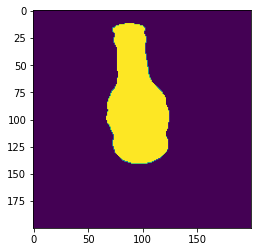

In [ ]:
import matplotlib.pyplot as plt

print(len(masks))
plt.imshow(t_mask.squeeze())

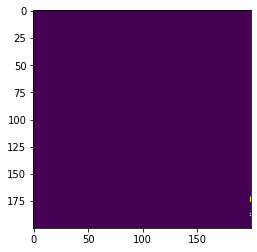

In [ ]:
mask = masks[0].squeeze()

mask[mask >= 0.5] = 1
mask[mask < 0.5] = 0

plt.imshow(mask)

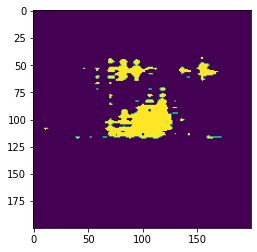

In [ ]:
mask = masks[1].squeeze()
mask[mask >= 0.5] = 1
mask[mask < 0.5] = 0

plt.imshow(mask)

<class 'numpy.ndarray'>
(200, 200, 3)


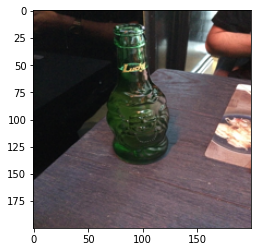

In [ ]:
img1 = torch.permute(image, (1, 2, 0)).numpy().astype(np.float64)

print(type(img1))
print(img1.shape)
plt.imshow(img1)

In [ ]:
labels

[3, 7]

In [ ]:
bbs

[[102, 96, 136, 126], [65, 87, 97, 114]]

In [ ]:
t_bbox

tensor([[ 72.3487,  92.1425, 136.1093, 124.9390]])

In [ ]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 32.1 MB/s 
     |████████████████████████████████| 182 kB 76.4 MB/s 
     |████████████████████████████████| 168 kB 74.8 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 168 kB 77.7 MB/s 
     |████████████████████████████████| 166 kB 51.1 MB/s 
     |████████████████████████████████| 166 kB 67.7 MB/s 
     |████████████████████████████████| 162 kB 76.7 MB/s 
     |████████████████████████████████| 162 kB 77.8 MB/s 
     |████████████████████████████████| 158 kB 81.5 MB/s 
     |████████████████████████████████| 157 kB 64.7 MB/s 
     |████████████████████████████████| 157 kB 82.6 MB/s 
     |████████████████████████████████| 157 kB 88.5 MB/s 
     |████████████████████████████████| 157 kB 89.7 MB/s 
     |████████████████████████████████| 157 kB 75.9 MB/s 
     |███████████████████████████

In [ ]:
bbs

[[199, 171, 199, 188], [8, 40, 175, 117]]

In [ ]:
bbs[0][0]

199

In [ ]:
bbs = [[a/200 for a in single] for single in bbs]
bbs

[[0.995, 0.855, 0.995, 0.94], [0.04, 0.2, 0.875, 0.585]]

In [ ]:
labels

[3, 7]

In [ ]:
confs

[0.07630770653486252, 0.055398982018232346]

In [ ]:
for bb, conf, label, mask in zip(bbs, confs, labels, masks):
    print(bb, conf, label)

[199, 171, 199, 188] 0.07630770653486252 3
[8, 40, 175, 117] 0.055398982018232346 7


In [ ]:
def make_wandb_visual(bbs, confs, labels, masks):
  wandb_results = {}

  class_labels = {
      0: 'background',
      1: 'Can',
      2: 'Foam',
      3: 'Glass',
      4: 'Metal',
      5: 'Other',
      6: 'Paper',
      7: 'Plastic',
      8: 'Vinyl' 
  }

  bbs = [[a/200 for a in single] for single in bbs]

  iter = len(bbs)

  
  wandb_results['predictions'] = {
      'box_data': [
            {
              'position': {
                  "minX": bb[0],
                  "maxX": bb[1],
                  "minY": bb[2],
                  "maxY": bb[3]
            },
            'class_id' : label,
            'box_caption': class_labels[label],
            'scores' : {
                'conf': conf,
                }
            } for bb, conf, label, mask in zip(bbs, confs, labels, masks)],
      'class_labes': class_labels
    } 
  
  return wandb_results
  


In [ ]:
a= make_wandb_visual(bbs, confs, labels, masks)

In [ ]:
a

{'predictions': {'box_data': [{'position': {'minX': 0.995,
     'maxX': 0.855,
     'minY': 0.995,
     'maxY': 0.94},
    'class_id': 3,
    'box_caption': 'Glass',
    'scores': {'conf': 0.07630770653486252}},
   {'position': {'minX': 0.04, 'maxX': 0.2, 'minY': 0.875, 'maxY': 0.585},
    'class_id': 7,
    'box_caption': 'Plastic',
    'scores': {'conf': 0.055398982018232346}}],
  'class_labes': {0: 'background',
   1: 'Can',
   2: 'Foam',
   3: 'Glass',
   4: 'Metal',
   5: 'Other',
   6: 'Paper',
   7: 'Plastic',
   8: 'Vinyl'}}}

In [ ]:
import numpy as np
import wandb

wandb.init()

image = torch.permute(image, (1, 2, 0)).numpy().astype(np.float64)

wandb_results_dic = make_wandb_visual(bbs, confs, labels, masks)

img = wandb.Image(image,
                    boxes = wandb_results_dic
                  )

wandb.log({"driving_scene": img})

In [ ]:
wandb_results_dic

{'box_data': [{'position': {'minX': 0.04,
    'maxX': 0.2,
    'minY': 0.875,
    'maxY': 0.585},
   'class_id': 7,
   'box_caption': 'Plastic',
   'scores': {'conf': 0.055398982018232346}}]}

In [ ]:
len(masks)

2

In [ ]:
masks1 = [mask.transpose((1,2,0)) for mask in masks]
for idx in range(len(masks1)):
  masks1[idx][masks1[idx] >= 0.3] = 1
  masks1[idx][masks1[idx] < 0.3] = 0

print(masks.shape)
print(masks1[1].shape)

(2, 1, 200, 200)
(200, 200, 1)


In [ ]:
labels

[3, 7]

In [ ]:
import sys
np.set_printoptions(threshold=sys.maxsize) 

In [ ]:
def wandb_image(masks, t_mask, image):

    class_labels = {
      0: 'background',
      1: 'Can',
      2: 'Foam',
      3: 'Glass',
      4: 'Metal',
      5: 'Other',
      6: 'Paper',
      7: 'Plastic',
      8: 'Vinyl' 
    }

    masks = [mask.transpose((1,2,0)) for mask in masks]
    for idx in range(len(masks1)):
        masks[idx][masks[idx] >= 0.3] = 1
        masks[idx][masks[idx] < 0.3] = 0

    for idx, label in enumerate(labels):
        masks[idx][masks[idx] == 1] = labels[idx]

    sum_mask = np.zeros_like(masks[0])
    for mask in masks:
        sum_mask += mask
    
    sum_mask = sum_mask.squeeze().astype(np.float64)
    t_mask = t_mask.squeeze().numpy().astype(np.float64)

    img33 = wandb.Image(image, masks={
        'predictions': {
            'mask_data': sum_mask,
            'class_labels': class_labels
        },
        'ground truth': {
            'mask_data': t_mask,
            'class label': class_labels
        }
    })
    wandb.log({'segmentation': img33})

In [ ]:
wandb.init()

img1 = torch.permute(image, (1, 2, 0)).numpy().astype(np.float64)

wandb_image(masks, t_mask, img1)